# Data Science Project

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [25]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [26]:
df['Data_Value'] = df['Data_Value'] * 0.1
#DateFrame over period of 2005-2014
df2005 = (df[df['Date'] < '2015-01-01']
          .replace('^([0-9]+)-','', regex = True)
          .sort_values(['Date', 'Element']))

df2005 = df2005[df2005['Date'] != '02-29']

In [27]:
#DataFrame for year 2015
df2015 = (df[df['Date'] >= '2015-01-01']
          .replace('^([0-9]+)-','', regex = True)
          .sort_values(['Date', 'Element'])
          .drop('ID', axis = 1))

In [28]:
#MaxTemp over period of 2005-2014
Tmax = (df2005[df2005['Element'] == 'TMAX']
        .copy()
        .set_index(['Date', 'Element'])
        .max(axis = 0, level = 'Date')
        .reset_index()
        .drop('ID', axis = 1))


#MinTemp over period of 2005-2014
Tmin = (df2005[df2005['Element'] == 'TMIN']
        .copy()
        .set_index(['Date', 'Element'])
        .min(axis = 0, level = 'Date')
        .reset_index()
        .drop('ID', axis = 1))

Tmax.index += 1
Tmin.index += 1

In [29]:
Day = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
#Day = list(map(int, Tmax.index))
TmaxList = list(map(float, Tmax['Data_Value']))
TminList = list(map(float ,Tmin['Data_Value']))

In [30]:
#MaxTemp of each day for year 2015
Tmax2015 = (df2015[df2015['Element'] == 'TMAX']
        .copy()
        .set_index(['Date', 'Element'])
        .max(axis = 0, level = 'Date')
        .reset_index())

#MinTemp of each day for year 2015
Tmin2015 = (df2015[df2015['Element'] == 'TMIN']
        .copy()
        .set_index(['Date', 'Element'])
        .min(axis = 0, level = 'Date')
        .reset_index())

Tmax2015.index += 1
Tmin2015.index += 1

In [31]:
Tmax2015['Data_Value'] =  Tmax2015['Data_Value'][Tmax2015['Data_Value'] > Tmax['Data_Value']]

Tmin2015['Data_Value'] =  Tmin2015['Data_Value'][Tmin2015['Data_Value'] < Tmin['Data_Value']]


In [35]:
Day2015 = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
#Day2015 = list(map(int, Tmax2015.index))
Tmax2015List = list(map(float, Tmax2015['Data_Value']))
Tmin2015List = list(map(float ,Tmin2015['Data_Value']))

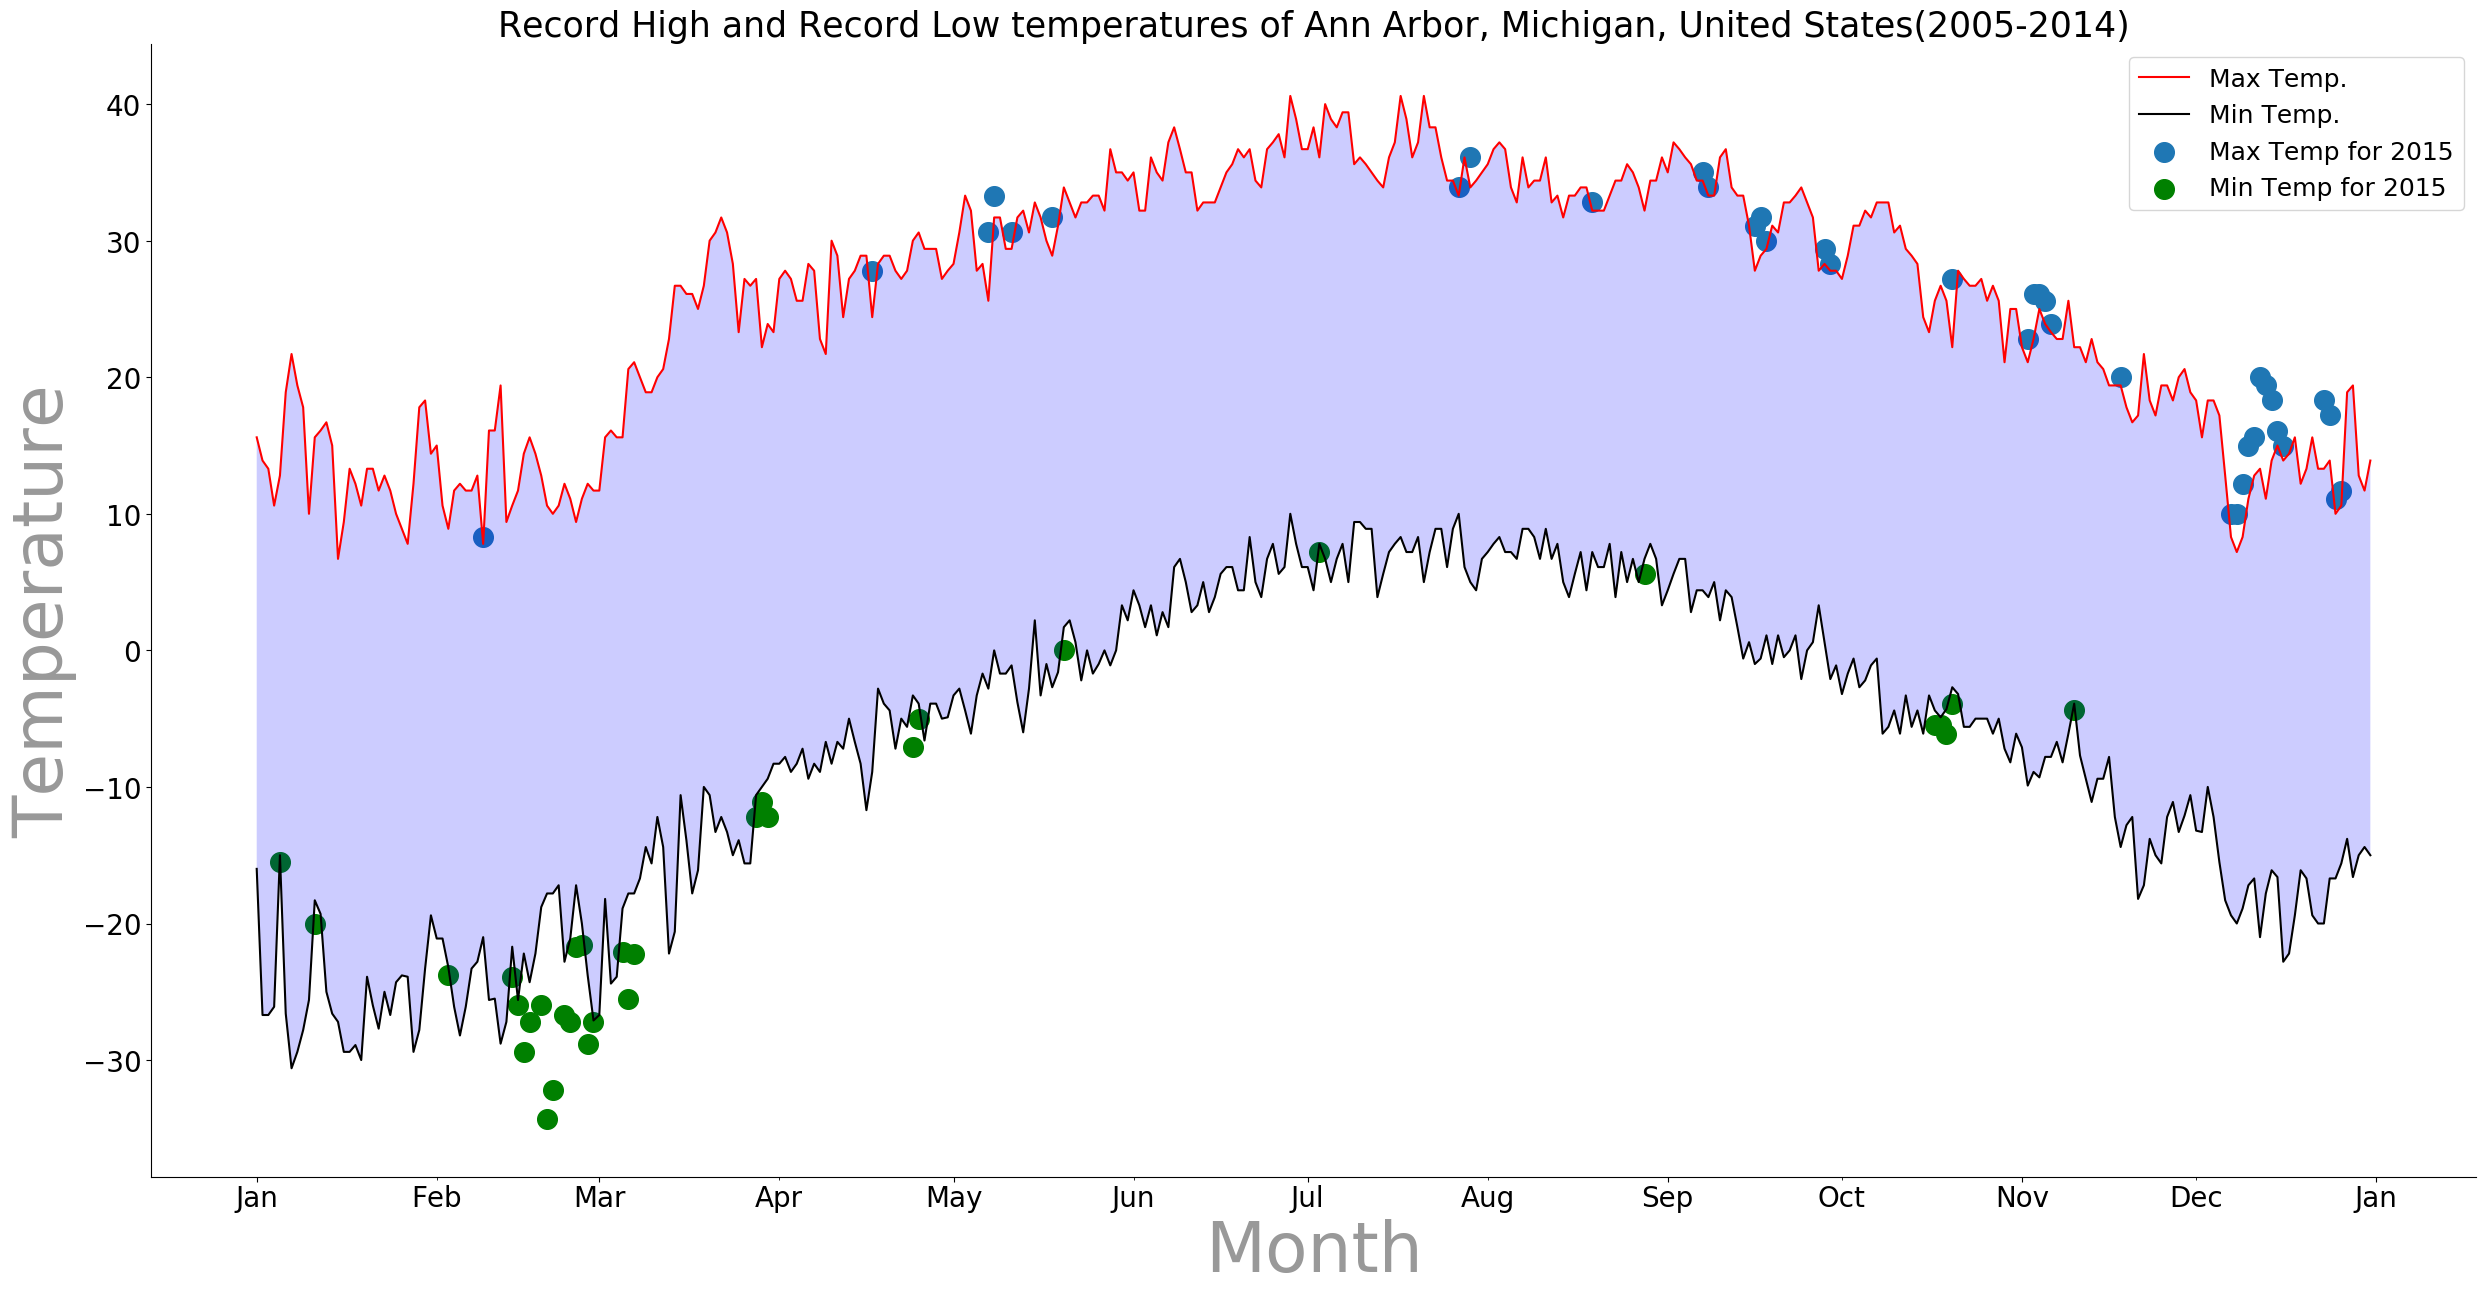

In [57]:
import matplotlib.ticker as ticker
plt.figure(figsize=(30, 15), dpi = 100)

plt.plot(Day, TmaxList, 'r-', label = 'Max Temp.')
plt.plot(Day, TminList, 'k-', label = 'Min Temp.')

plt.scatter(Day2015, Tmax2015List, s = 200, label = 'Max Temp for 2015')
plt.scatter(Day2015, Tmin2015List, s = 200, c = 'green', label = 'Min Temp for 2015')

plt.xlabel('Month', alpha = 0.4)
plt.ylabel('Temperature', alpha = 0.4)
plt.title('Record High and Record Low temperatures of Ann Arbor, Michigan, United States(2005-2014)', fontdict = {'fontsize' : 25})
plt.legend()

plt.gca().fill_between(Day, TmaxList, TminList, facecolor='blue', alpha=0.2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=1)) # Put the label at the minor tick so it's in the center.
#ax.yaxis.set_minor_locator()
# What you put at the ticks:
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(axis = 'both', which = 'both', labelsize = 20)
plt.rc('legend', fontsize=18)
plt.show()